<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers

import tensorflow.keras.utils as ku
import numpy as np

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2020-05-26 14:45:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.002s  

2020-05-26 14:45:04 (58.5 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
data =open("/tmp/sonnets.txt").read()

corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [0]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [0]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen = max_sequence_len,
                                         padding = "pre"))

In [0]:
# create predictors and label 
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [7]:
model = Sequential()
model.add(Embedding(input_dim = total_words, 
                    output_dim= 100,
                    input_length = max_sequence_len -1))# Your Embedding Layer)
model.add(LSTM(150, return_sequences =True)) # An LSTM Layer) # Could make it bidirectional
model.add(Dropout(0.2)) # A dropout layer)
model.add(LSTM(100)) # Another LSTM Layer)
model.add(Dense(total_words/2,
                activation = "relu", 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5,l2=1e-4),
                bias_regularizer = regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5))) # A Dense Layer including regularizers)
model.add(Dense(total_words, activation = "softmax")) # A Dense Layer)

# Pick an optimizer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Pick a loss function and an optimizer)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
lstm (LSTM)                  (None, 10, 150)           150600    
_________________________________________________________________
dropout (Dropout)            (None, 10, 150)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 5,891,071
Trainable params: 5,891,071
Non-trainable params: 0
______________________________________________

In [8]:
history = model.fit(predictors, label, epochs = 100, verbose =1)

Epoch 1/100
484/484 [==============================] - 11s 22ms/step - loss: 6.8727 - accuracy: 0.0234
Epoch 2/100
484/484 [==============================] - 11s 22ms/step - loss: 6.5264 - accuracy: 0.0219
Epoch 3/100
484/484 [==============================] - 11s 24ms/step - loss: 6.3855 - accuracy: 0.0262
Epoch 4/100
484/484 [==============================] - 11s 23ms/step - loss: 6.2069 - accuracy: 0.0343
Epoch 5/100
484/484 [==============================] - 11s 23ms/step - loss: 6.0086 - accuracy: 0.0406
Epoch 6/100
484/484 [==============================] - 11s 23ms/step - loss: 5.8169 - accuracy: 0.0455
Epoch 7/100
484/484 [==============================] - 11s 23ms/step - loss: 5.6325 - accuracy: 0.0546
Epoch 8/100
484/484 [==============================] - 11s 22ms/step - loss: 5.4587 - accuracy: 0.0600
Epoch 9/100
484/484 [==============================] - 11s 23ms/step - loss: 5.2768 - accuracy: 0.0690
Epoch 10/100
484/484 [==============================] - 11s 22ms/step - l

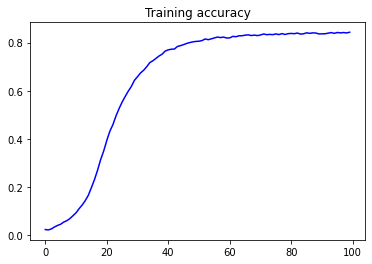

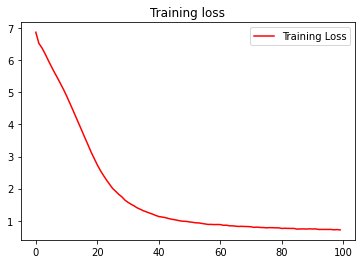

In [9]:
import matplotlib.pyplot as plt 

acc = history.history["accuracy"]
loss = history.history["loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "b", label ="Training accuracy")
plt.title("Training accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label = "Training Loss")
plt.title("Training loss")
plt.legend()

plt.show()

In [16]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1,
                             padding = "pre")
  predicted = model.predict_classes(token_list, verbose =0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " "+ output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope should blame his part another show it it live bright days still rare rare rare men's care me rolling rolling rolling check heaven thee forth way forth go of kings lie to all thee so true she with you near lie new in green it it live knows what still live knows in it as it live still still bright so rare men's you still keep bright doth seen told to heart with loss to character of flowers and happy hours with hue forth life to lie to this hell 'no hell doth lie new new live more more bright


In [11]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')

Using TensorFlow backend.
